<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [19]:
import pandas as pd
import numpy as np
import csv
import missingno as msno
from pyspark.sql import SparkSession, Window
import pyspark.sql.functions as F

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [7]:
spark = SparkSession.builder.appName('defi-ia-2022').getOrCreate()
df = spark.read.csv("fichier de seb.csv", header=True, inferSchema=True)
df.printSchema()

root
 |-- number_sta: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- wind_speed: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- dew_point_temperature: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- wind_direction: double (nullable = true)
 |-- precipitation: double (nullable = true)
 |-- Id: string (nullable = true)



In [9]:
df = df.selectExpr("number_sta", "date", "wind_speed as ff",
                   "temperature as t", "dew_point_temperature as td", "humidity as hu",
                   "wind_direction as dd", "precipitation as precip", "Id")

In [10]:
w1 = Window.partitionBy("number_sta")

df = df.withColumn("max_t", F.max("t").over(w1))
df = df.withColumn("min_t", F.min("t").over(w1)) 
df = df.withColumn("max_ff", F.max("ff").over(w1)) 
df = df.withColumn("min_ff", F.min("ff").over(w1)) 
df = df.withColumn("max_td", F.max("td").over(w1)) 
df = df.withColumn("min_td", F.min("td").over(w1)) 
df = df.withColumn("max_hu", F.max("hu").over(w1)) 
df = df.withColumn("min_hu", F.min("hu").over(w1)) 
df = df.withColumn("mean_dd", F.mean("dd").over(w1)) 
df = df.withColumn("max_precip", F.max("precip").over(w1)) 
df = df.withColumn("min_precip", F.min("precip").over(w1))

In [15]:
pd.DataFrame(df.take(5), columns=df.columns)

,number_sta,date,ff,t,td,hu,dd,precip,Id,max_t,min_t,max_ff,min_ff,max_td,min_td,max_hu,min_hu,mean_dd,max_precip,min_precip
0,14372001,2016-01-01 00:00:00,3.68,279.20,277.79,90.8,230.0,0.0,14372001_0_0,307.48,267.94,15.61,0.0,293.5,261.83,100.0,24.9,204.953012,13.9,0.0
1,14372001,2016-01-01 01:00:00,2.99,278.86,277.57,91.5,221.0,0.0,14372001_0_1,307.48,267.94,15.61,0.0,293.5,261.83,100.0,24.9,204.953012,13.9,0.0
2,14372001,2016-01-01 02:00:00,2.06,278.26,277.58,95.4,204.0,0.0,14372001_0_2,307.48,267.94,15.61,0.0,293.5,261.83,100.0,24.9,204.953012,13.9,0.0
3,14372001,2016-01-01 03:00:00,2.14,276.89,276.43,96.7,197.0,0.0,14372001_0_3,307.48,267.94,15.61,0.0,293.5,261.83,100.0,24.9,204.953012,13.9,0.0
4,14372001,2016-01-01 04:00:00,2.10,276.91,276.75,98.7,184.0,0.0,14372001_0_4,307.48,267.94,15.61,0.0,293.5,261.83,100.0,24.9,204.953012,13.9,0.0


In [16]:
def spark_to_csv(df, file_path):
    """ Converts spark dataframe to CSV file """
    with open(file_path, "w") as f:
        writer = csv.DictWriter(f, fieldnames=df.columns)
        writer.writerow(dict(zip(df.columns, df.columns)))
        for row in df.toLocalIterator():
            writer.writerow(row.asDict())

In [17]:
spark_to_csv(df, "polaki.csv")

In [18]:
train = pd.read_csv("polaki.csv")

<AxesSubplot:>

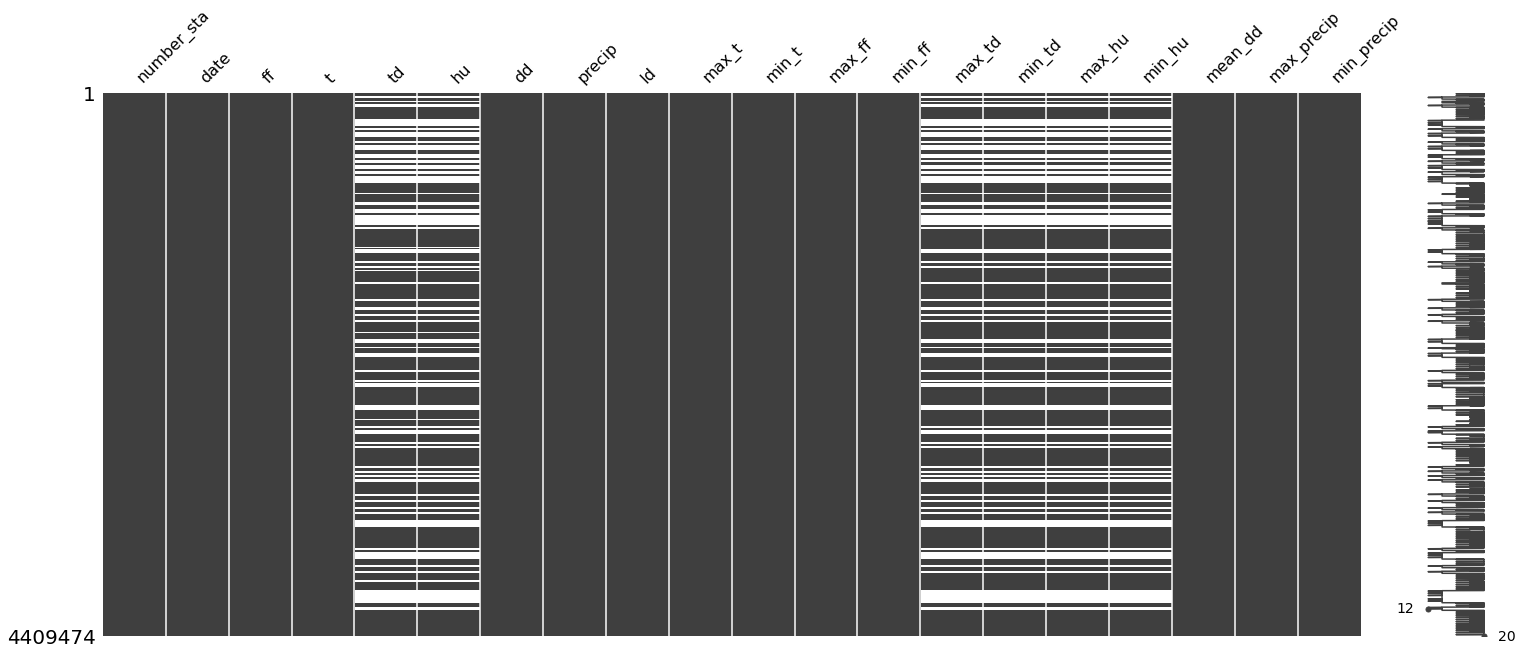

In [21]:
msno.matrix(train)

In [ ]:
train = train.groupby("")